In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def f(x, y, E):
    y1, y2 = y
    return np.array([y2, -E*y1])


def TISE_solver(E, m, L, h=1e-3):
    hbar = 6.626e-34/(2*np.pi)
    k2 = (2*m*E)/(hbar**2)   # correct wave number squared

    x_vals = np.arange(0, L+h, h)
    psi_vals = []

    # initial conditions: psi(0)=0, psi'(0)=1
    y = np.array([0.0, 1.0])  
    
    for x in x_vals:
        psi_vals.append(y[0])
        
        # RK4 steps
        K1 = f(x, y, k2)
        K2 = f(x + h/2, y + h*K1/2, k2)
        K3 = f(x + h/2, y + h*K2/2, k2)
        K4 = f(x + h, y + h*K3, k2)
        
        y = y + (h/6)*(K1 + 2*K2 + 2*K3 + K4)
    
    psi_vals = np.array(psi_vals)
    norm = np.trapz(psi_vals**2, x_vals)
    psi_vals = psi_vals / np.sqrt(norm)
    return np.array(x_vals), psi_vals

def Energy(m, L, n):
    h = 6.626e-34

    return ((n*h)**2)/(8*m*(L**2))

def expected_psi(n, m, L, x):
    return np.sqrt(2/L) * (np.sin((n*np.pi*x)/L))

C:\Users\shrey\AppData\Local\Temp\ipykernel_19856\2315405107.py:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  norm = np.trapz(psi_vals**2, x_vals)


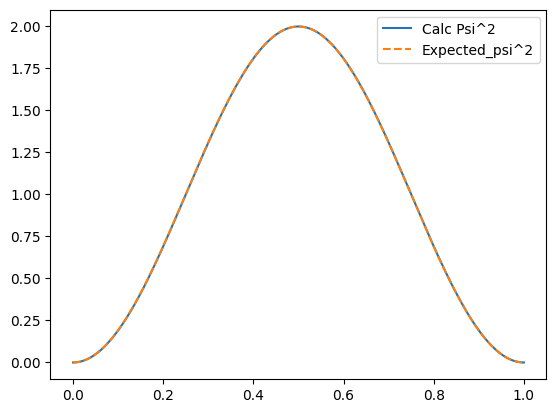

In [32]:
mass = 1
length = 1

x, psi_1 = TISE_solver(Energy(mass,length, 1), mass, length)
psi_1_exp = expected_psi(1, mass, length, x)

plt.plot(x, np.abs(psi_1)**2, label = "Calc Psi^2")
plt.plot(x, np.abs(psi_1_exp)**2, label = "Expected_psi^2", linestyle = "--")
plt.legend()
plt.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_19856\2315405107.py:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  norm = np.trapz(psi_vals**2, x_vals)


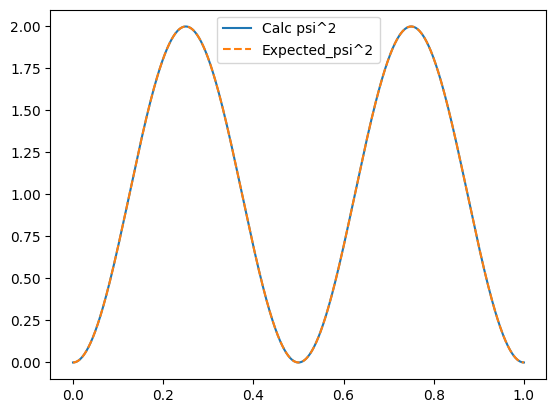

In [33]:
x, psi_2 = TISE_solver(Energy(mass,length, 2), mass, length)
psi_2_exp = expected_psi(2, mass, length, x)

plt.plot(x, np.abs(psi_2)**2, label = "Calc psi^2")
plt.plot(x, np.abs(psi_2_exp)**2, label = "Expected_psi^2", linestyle = "--")
plt.legend()
plt.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_19856\2315405107.py:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  norm = np.trapz(psi_vals**2, x_vals)


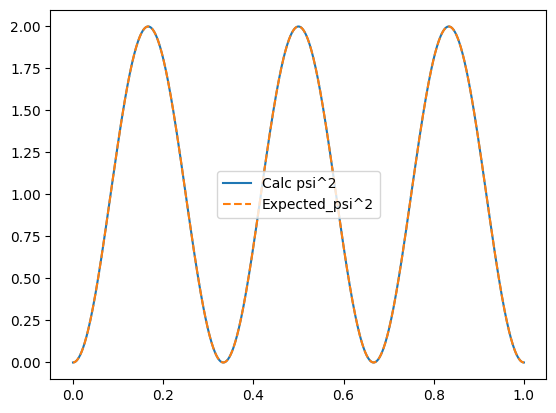

In [34]:
x, psi_3 = TISE_solver(Energy(mass,length, 3), mass, length)
psi_3_exp = expected_psi(3, mass, length, x)

plt.plot(x, np.abs(psi_3)**2, label = "Calc psi^2")
plt.plot(x, np.abs(psi_3_exp)**2, label = "Expected_psi^2", linestyle = "--")
plt.legend()
plt.show()